# Explore here

In [1]:
# Librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests

In [2]:
# Data

url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
response = requests.get(url)

if response.status_code == 200:

    from io import StringIO
    df = pd.read_csv(StringIO(response.text))

else:
    print(f"Error al acceder a la URL: {response.status_code}")

df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [3]:
df_2 = df[['MedInc','Latitude','Longitude']]
df_2

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


In [4]:
# Separamos los conjuntos de train y test

from sklearn.model_selection import train_test_split

X_train, X_test, _,_ = train_test_split(df_2,_,test_size=0.2,random_state=42)

In [ ]:
# Definición , entrenamiento del modelo (clustering)

from sklearn.cluster import KMeans

model = KMeans(n_clusters = 6, random_state = 42)

X_train['cluster'] = model.fit_predict(X_train)

X_train


,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5
...,...,...,...,...
11284,6.3700,33.78,-117.96,2
11964,3.0500,34.02,-117.43,3
5390,2.9344,34.03,-118.38,3
860,5.7192,37.58,-121.96,0


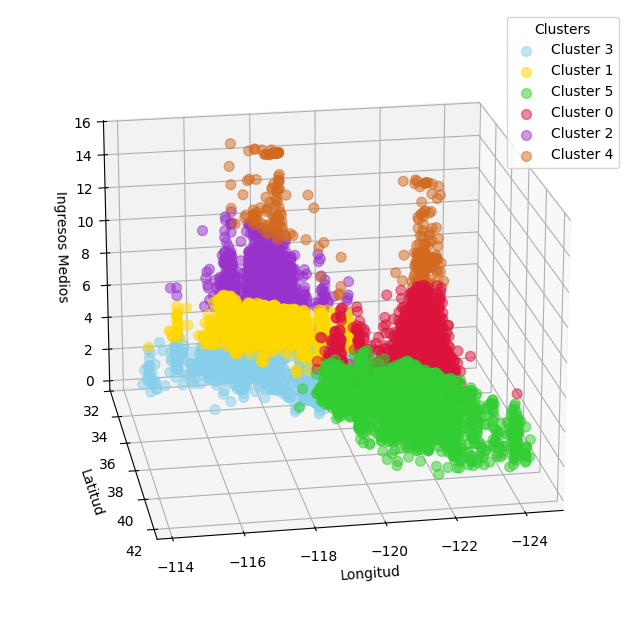

In [6]:
# Graficamos resultados para análisis

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

colors=['SkyBlue', 'Gold', 'LimeGreen', 'Crimson', 'DarkOrchid', 'Chocolate']

for i,color in zip(X_train['cluster'].unique(),colors):
    subset = X_train[X_train['cluster']==i]
    ax.scatter(subset['Longitude'],subset['Latitude'],subset['MedInc'],s=50,alpha=0.5,marker='o',c=[color],label=f'Cluster {i}')

ax.view_init(elev=20,azim=80)

ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_zlabel('Ingresos Medios')
ax.legend(title='Clusters')

plt.show()

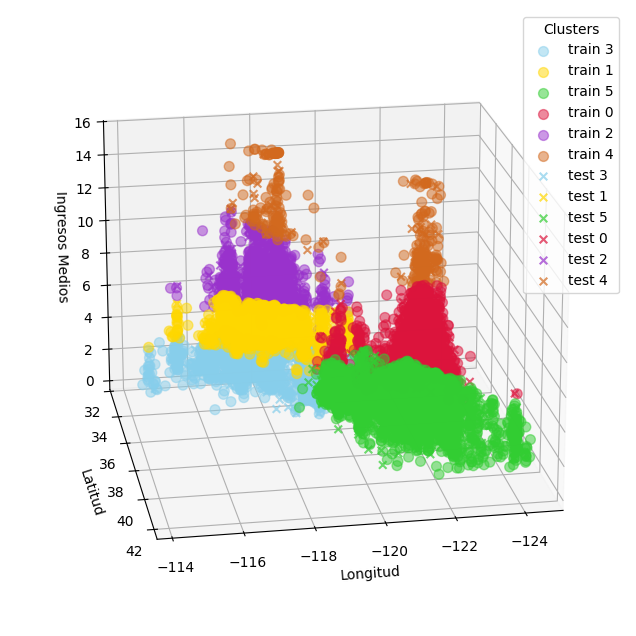

In [8]:
# Predicciones

X_test['cluster'] = model.predict(X_test)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

colors=['SkyBlue', 'Gold', 'LimeGreen', 'Crimson', 'DarkOrchid', 'Chocolate']

for i,color in zip(X_train['cluster'].unique(),colors):
    subset = X_train[X_train['cluster']==i]
    ax.scatter(subset['Longitude'],subset['Latitude'],subset['MedInc'],s=50,alpha=0.5,marker='o',c=[color],label=f'train {i}')

for i,color in zip(X_train['cluster'].unique(),colors):
    subset = X_test[X_test['cluster']==i]
    ax.scatter(subset['Longitude'],subset['Latitude'],subset['MedInc'],s=30,alpha=0.7,marker='x',c=[color],label=f'test {i}')

ax.view_init(elev=20,azim=80)

ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_zlabel('Ingresos Medios')
ax.legend(title='Clusters')

plt.show()

No se observan casi cruces fuera de los circulos, por lo tanto la predicción del cluster al que corresponde cada entidad esta muy bien.

In [9]:
# Tratamiendo de datos para modelo supervidado ML

y_train = X_train['cluster']
y_test = X_test['cluster']
X_train.drop('cluster', axis=1,inplace=True)
X_test.drop('cluster',axis=1,inplace=True)

In [11]:
# Se utilizan arbol de decision y random forest por la naturaleza de los datos

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model_tree = DecisionTreeClassifier(random_state=42)
model_rf = RandomForestClassifier(random_state=42)

model_tree.fit(X_train,y_train)
model_rf.fit(X_train,y_train)

y_pred_tree = model_tree.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

from sklearn.metrics import accuracy_score

print(f'Accuracy DecisionTree: {accuracy_score(y_pred_tree,y_test)}')
print(f'Accuracy RandomForest {accuracy_score(y_pred_rf,y_test)}')

Accuracy DecisionTree: 0.9951550387596899
Accuracy RandomForest 0.9963662790697675


In [ ]:
# Guardamos los modelos 

from pickle import dump

dump(model,open('../models/k-means_6_42.sav','wb'))
dump(model_tree,open('../models/dt_42.sav','wb'))
dump(model_rf,open('../models/rf_42.sav','wb'))